<a href="https://colab.research.google.com/github/suhacker1/SecureML_Tests/blob/master/Foolbox_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Attacks Against MobileNet Using FoolBox

In [1]:
!pip install foolbox

In [0]:
#Import dependencies 
import foolbox as fb 
import torchvision.models as models
import eagerpy as ep 
import numpy as np
from foolbox import PyTorchModel, accuracy, samples
import foolbox.attacks as fba

In [0]:
# Download MobileNet pretrained on ImageNet
mobilenet = models.mobilenet_v2(pretrained=True)
model = mobilenet.eval()

In [0]:
# A preprocessing method utilized in previous literature was chosen
preprocessing = dict(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], axis=-3) 

# Defines interface for model
fmodel = PyTorchModel(model, bounds=(0, 1), preprocessing=preprocessing) 

# Interesting note: PyTorchModel inherits ModelWithPreprocessing for multi-platform use
# PyTorchModel definition: https://bit.ly/2LoAanD

In [0]:
# A random sample of images are chosen for the attack
images, labels = ep.astensors(*samples(fmodel, dataset="imagenet", batchsize=16))

In [0]:
# Implements FGSM- Fast Gradient Sign Method (White Box)
attack = fba.FGSM()

# Test 8 different epsilon values =
epsilons = [0.0, 0.001, 0.01, 0.03, 0.1, 0.3, 0.5, 1.0]

# Generate raw images, clipped images, and truth values for images
raw, clipped, is_adv = attack(fmodel, images, labels, epsilons=epsilons)

In [7]:
# Note length of the list is = num of epsilon values 
len(raw)

8

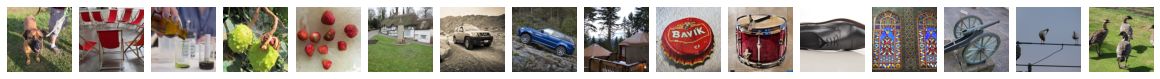

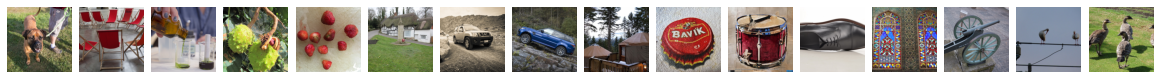

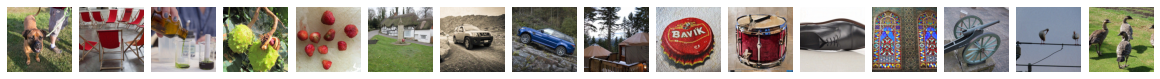

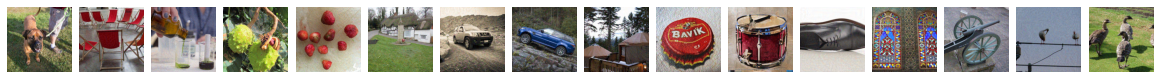

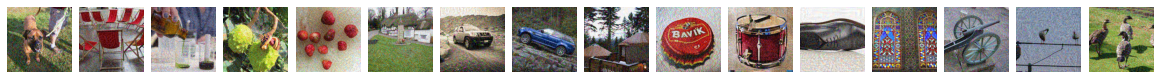

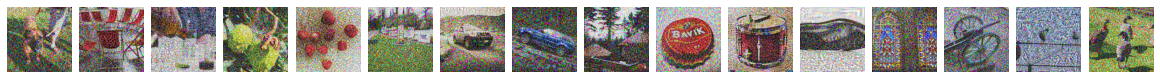

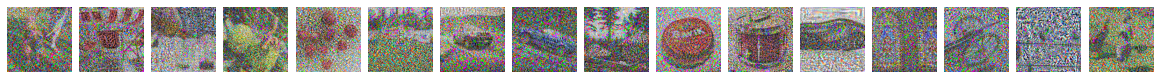

In [8]:
# Display adversarially perturbated images 
for image in raw:
    fb.plot.images(image)

In [0]:
# Implement the black box boundary attack
# Note this will take longer than the previous attack
attack = fba.BoundaryAttack()
#epsilons = [0.0, 0.001, 0.01, 0.03, 0.1]
raw, clipped, is_adv = c(fmodel, images, labels, epsilons=0.03)

In [20]:
# Show successes and failures of attack
is_adv

PyTorchTensor(tensor([False, False, False, False, False, False, False,  True, False, False,
                      False, False, False, False,  True, False], device='cuda:0'))

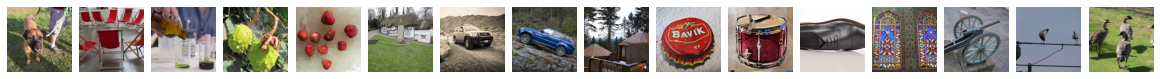

In [22]:
# Display raw images
fb.plot.images(raw)

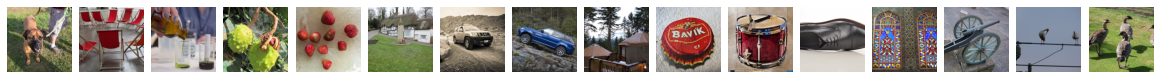

In [23]:
# Display clipped images
fb.plot.images(clipped)

## Framework Evaluation

Foolbox is easy to use and quick to set up. Inheritance makes it easy to shift between platforms. The parameters work on lists as well as the types itself. The documentation is currently in development, but the function definitions make the necessary actions seem obvious enough. Some improvements are: 

*   Complexity estimates for attacks 
*   Easier hyperparameter tweaking 

